<img src="images/aaib.PNG" style="width:400px;height:250px;">

## Machine Learning: Hello World (Regressor version)!

#### The major task here is to predict median house values in Californian districts, given features from these districts

#### Dataset and coding inspiration used here can be found at: Géron, A. (2017). Hands-on machine learning with scikit-learn and tensorflow: Concepts. Tools, and Techniques to build intelligent systems.

# Setup

In [1]:
# Commonly used libraries
import numpy as np
import pandas as pd
import os

# From scikitlearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# to keep stability
np.random.seed(42)

# To plot 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Ignore useless warnings 
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Loading  and Overview of the Data 

In [2]:
housing = pd.read_csv('dataset/housing.csv')

In [3]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

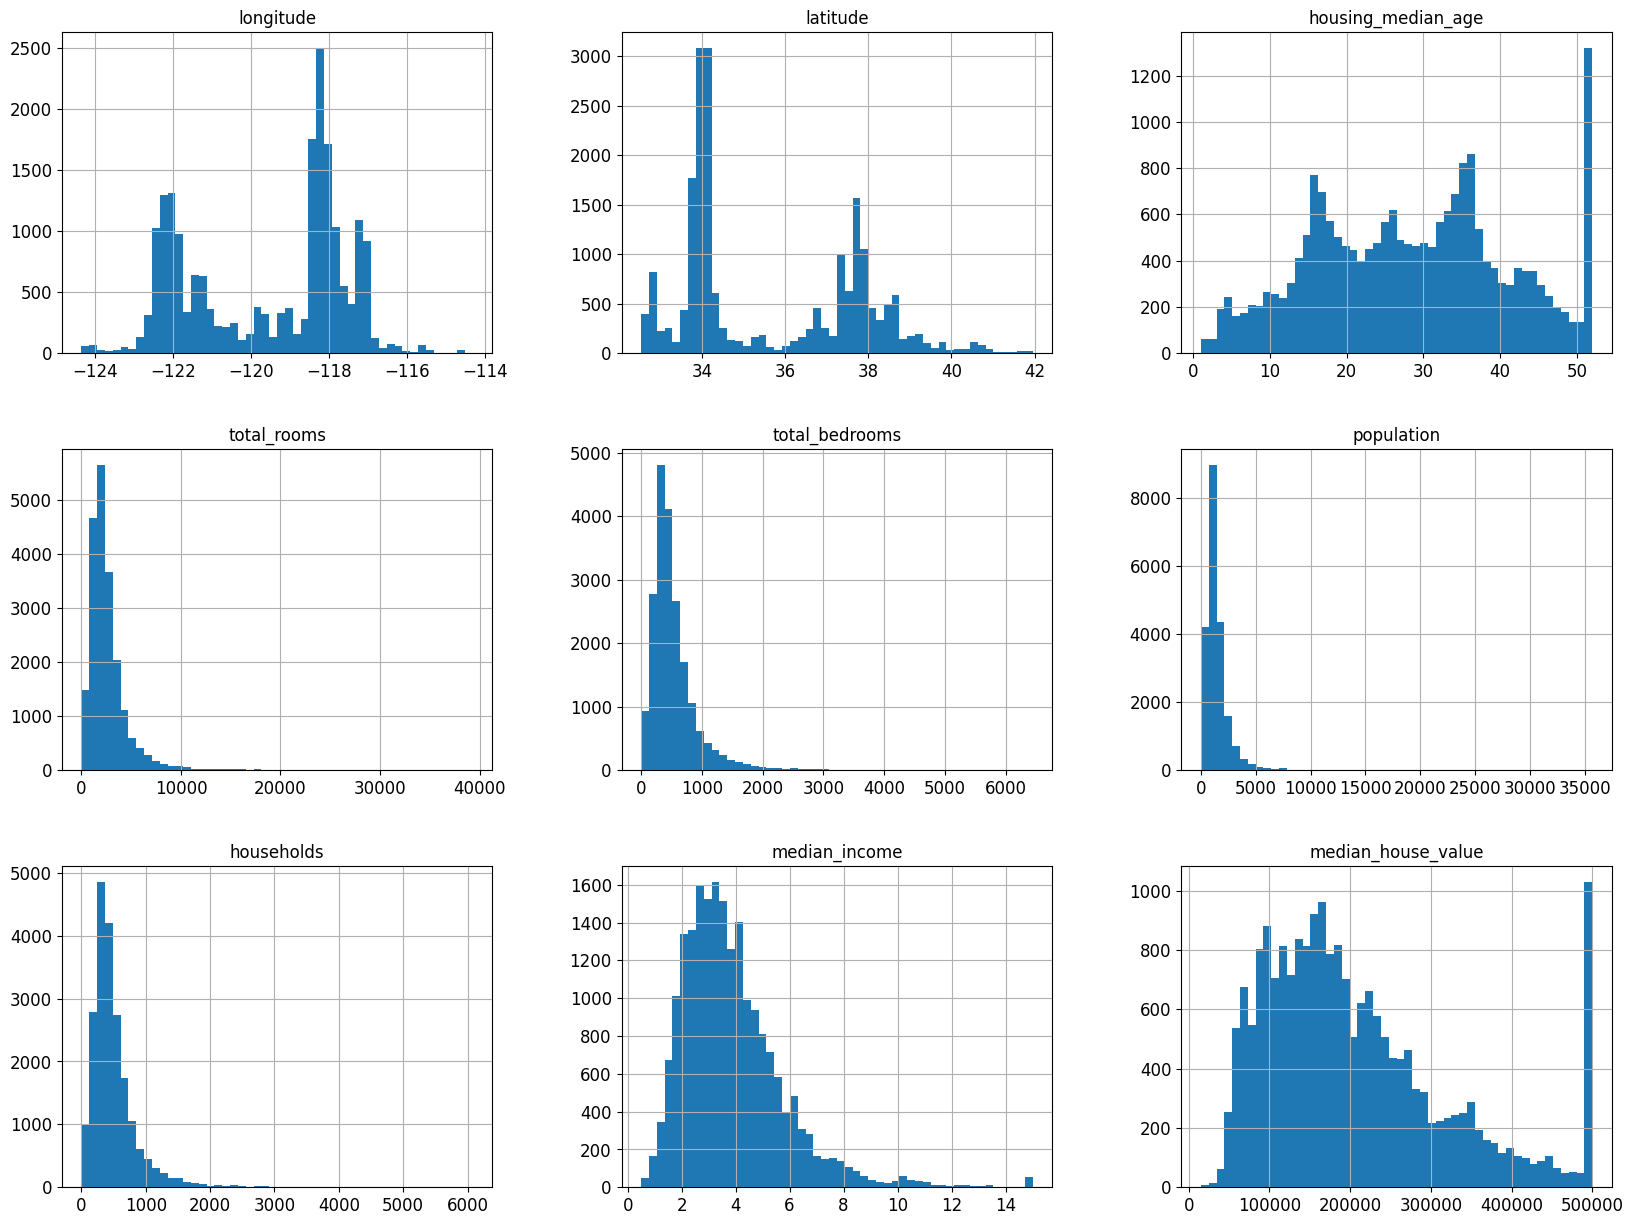

In [7]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
## For illustration only. Sklearn has train_test_split()

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

#### We will use the scikit learn option, but keep in mind that probably the best solution is to use each instance’s identifier to decide whether or not it should go in the test set (assuming instances have a unique and immutable identifier)

#### Also, So far we have considered purely random sampling methods. This is generally fine if your dataset is large enough (especially relative to the number of attributes), but if it is not, you run the risk of introducing a significant sampling bias. 

In [9]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [10]:
train_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   

       population  households  median_income  median_house_value  \
14196      2300.0       623.0         3.2596            103000.0   
8267       1314.0       756.0         3.8125            382100.0   
17445       915.0       336.0         4.1563            172600.0   
14265      1418.0       355.0         1.9425             93400.0   
2271        874.0       380.0         3.5542             96500.0   

      ocean_proximity  
14196      NEAR OCEAN  
8267       NEAR OCEAN  
17445      NEAR OCEAN  
14265      NEAR OCEAN  
2271           INLAND

In [11]:
test_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                25.0       1505.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
15663    -122.44     37.80                52.0       3830.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   
9814     -121.93     36.62                34.0       2351.0             NaN   

       population  households  median_income  median_house_value  \
20046      1392.0       359.0         1.6812             47700.0   
3024       1565.0       584.0         2.5313             45800.0   
15663      1310.0       963.0         3.4801            500001.0   
20484      1705.0       495.0         5.7376            218600.0   
9814       1063.0       428.0         3.7250            278000.0   

      ocean_proximity  
20046          INLAND  
3024           INLAND  
15663        NEAR BAY  
20484       <1H OCEAN  
9814       NEAR OCEAN

#### Now, we suppose experts in real estate have said that median income is very important in predicting house price, so we need to create categories for the continous variable we have 

#### We can check if it is worthy to split train and test based on this variable then...

<Axes: >

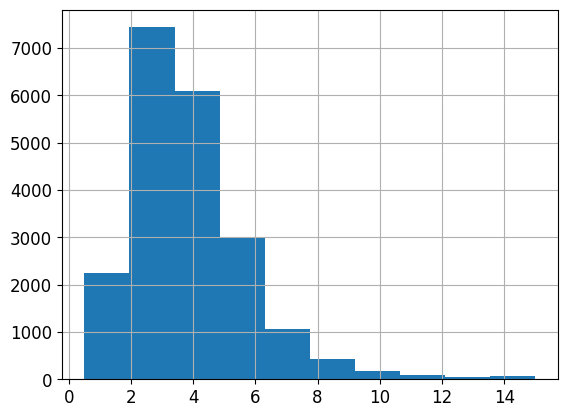

In [12]:
housing["median_income"].hist()

#### The following code creates an income category attribute by dividing the median income by 1.5 (to limit the number of income categories), and rounding up using ceil (to have discrete categories), and then merging all the categories greater than 5 into category 5:

In [13]:
# Divide by 1.5 to limit the number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [14]:
housing["income_cat"].value_counts()

income_cat
3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: count, dtype: int64

<Axes: >

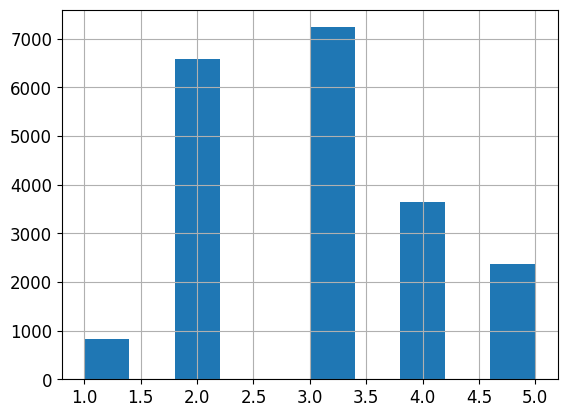

In [15]:
housing["income_cat"].hist()

In [16]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
# we can look at the income category proportions in the test set and then in the full housing dataset

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: count, dtype: float64

In [18]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64

# Discover and visualize the data to gain insights

#### This phase can be very long, it needs to be done well, and in this very first example we will not focus on this part. Instead, In Lecture 2, we will play a bit more with Data PreProcessing Treatments

In [19]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

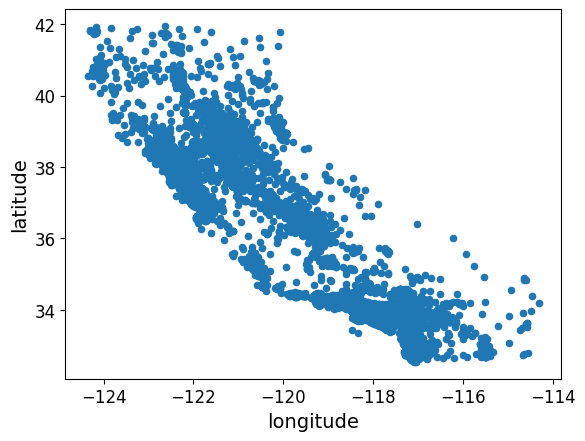

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude")

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)

<Axes: xlabel='longitude', ylabel='latitude'>

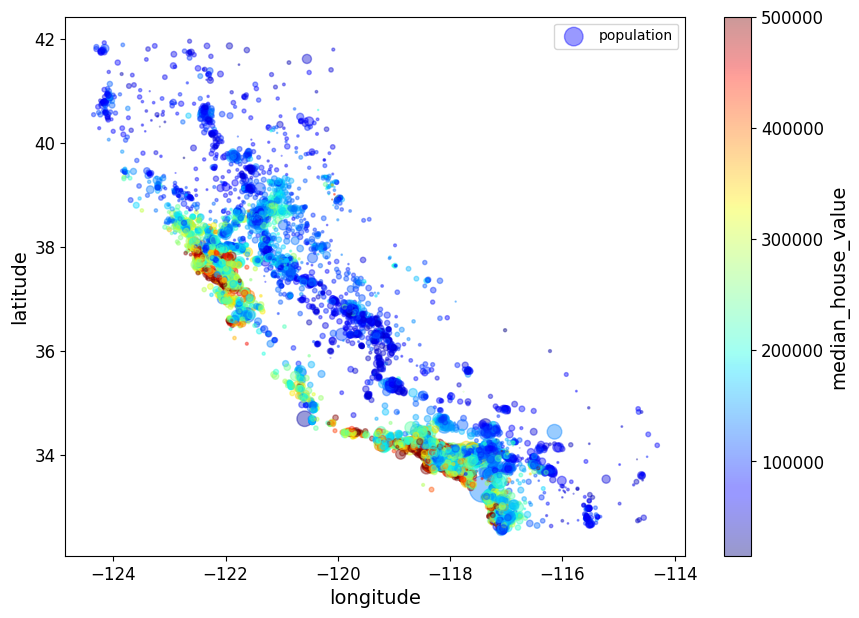

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [23]:
corr_matrix = (housing.drop("ocean_proximity",axis=1)).corr()


In [24]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
income_cat            0.642256
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

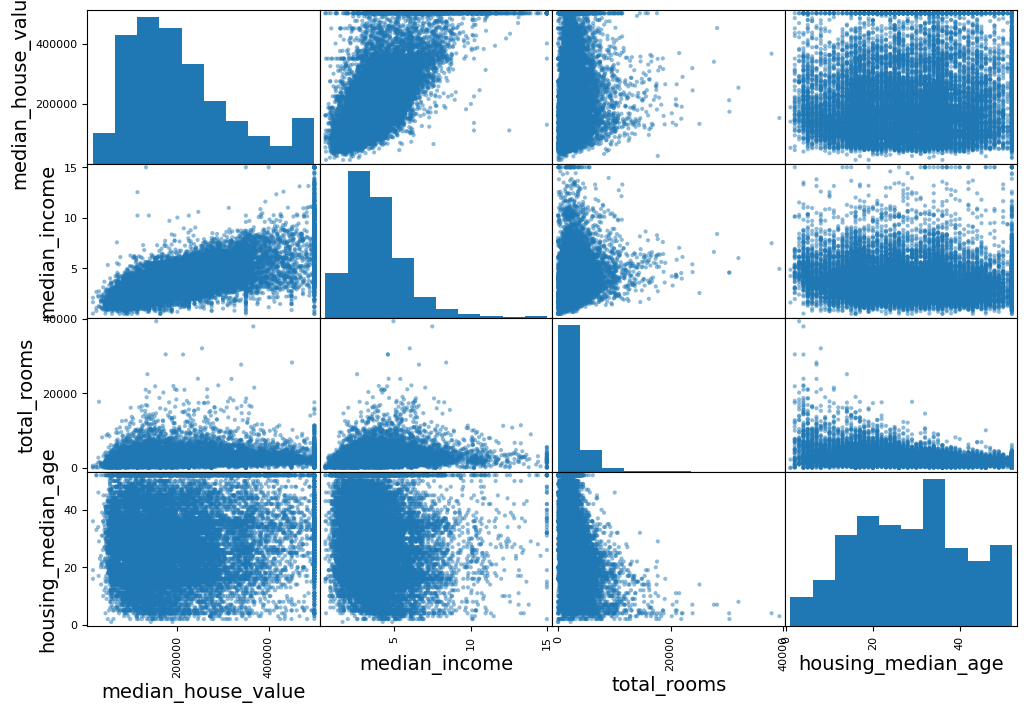

In [25]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

# Prepare the data for Machine Learning algorithms

In [26]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [27]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1606     -122.08     37.88                26.0       2947.0             NaN   
10915    -117.87     33.73                45.0       2264.0             NaN   
19150    -122.70     38.35                14.0       2313.0             NaN   
4186     -118.23     34.13                48.0       1308.0             NaN   
16885    -122.40     37.58                26.0       3281.0             NaN   

       population  households  median_income ocean_proximity  income_cat  
1606        825.0       626.0         2.9330        NEAR BAY         2.0  
10915      1970.0       499.0         3.4193       <1H OCEAN         3.0  
19150       954.0       397.0         3.7813       <1H OCEAN         3.0  
4186        835.0       294.0         4.2891       <1H OCEAN         3.0  
16885      1145.0       480.0         6.3580      NEAR OCEAN         5.0

In [28]:
# option 1 - to drop missing values
#sample_incomplete_rows.dropna(subset=["total_bedrooms"])    

In [29]:
# option 2 - to drop missing values
#sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

In [30]:
# option 3 - fill nan with median in specific column
#median = housing["total_bedrooms"].median()
#sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) 
#sample_incomplete_rows

In [31]:
# option 4 - use imputer in the whole data, but we need to remove categorical feature (missing) before, 
# because it will only work on numerical data

imputer = SimpleImputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

In [32]:
# housing_num = housing.drop('ocean_proximity', axis=1)
# alternatively: 
housing_num = housing.select_dtypes(include=[np.number])

In [33]:
housing_num

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  income_cat  
12655      2237.0       706.0         2.1736         2.0  
15502      2015.0       768.0         6.3373         5.0  
2908        667.0       300.0         2.8750         2.0  
14053       898.0       483.0         2.2264         2.0  
20496      1837.0       580.0         4.4964         3.0  
...           ...         ...            ...         ...  
15174      2026.0      1001.0         5.0900         4.0  
12661      4769.0      1418.0         2.8139         2.0  
19263       458.0       172.0         3.1797         3.0  
19140      1208.0       501.0         4.1964         3.0  
19773       625.0       197.0         3.1319         3.0  

[16512 rows x 9 columns]

In [34]:
imputer.fit_transform(housing_num)
# The imputer has simply computed the median of each attribute and stored the result in its statistics_ 
# instance variable. Only the total_bedrooms attribute had missing values, but we cannot be sure that 
# there won’t be any missing values in new data after the system goes live, so it is safer to 
# apply the imputer to all the numerical attributes

array([[-121.46  ,   38.52  ,   29.    , ...,  706.    ,    2.1736,
           2.    ],
       [-117.23  ,   33.09  ,    7.    , ...,  768.    ,    6.3373,
           5.    ],
       [-119.04  ,   35.37  ,   44.    , ...,  300.    ,    2.875 ,
           2.    ],
       ...,
       [-122.72  ,   38.44  ,   48.    , ...,  172.    ,    3.1797,
           3.    ],
       [-122.7   ,   38.31  ,   14.    , ...,  501.    ,    4.1964,
           3.    ],
       [-122.14  ,   39.97  ,   27.    , ...,  197.    ,    3.1319,
           3.    ]])

In [35]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

Check that this is the same as manually computing the median of each attribute:

In [36]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [37]:
housing_num

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  income_cat  
12655      2237.0       706.0         2.1736         2.0  
15502      2015.0       768.0         6.3373         5.0  
2908        667.0       300.0         2.8750         2.0  
14053       898.0       483.0         2.2264         2.0  
20496      1837.0       580.0         4.4964         3.0  
...           ...         ...            ...         ...  
15174      2026.0      1001.0         5.0900         4.0  
12661      4769.0      1418.0         2.8139         2.0  
19263       458.0       172.0         3.1797         3.0  
19140      1208.0       501.0         4.1964         3.0  
19773       625.0       197.0         3.1319         3.0  

[16512 rows x 9 columns]

Transform the training set:

In [38]:
# we use the “trained” imputer to transform the training set by replacing missing values by the learned medians:
X = imputer.transform(housing_num)

# The result is a plain Numpy array containing the transformed features. If you want to put it back into 
# a Pandas DataFrame, it’s simple:

In [39]:
X

array([[-121.46  ,   38.52  ,   29.    , ...,  706.    ,    2.1736,
           2.    ],
       [-117.23  ,   33.09  ,    7.    , ...,  768.    ,    6.3373,
           5.    ],
       [-119.04  ,   35.37  ,   44.    , ...,  300.    ,    2.875 ,
           2.    ],
       ...,
       [-122.72  ,   38.44  ,   48.    , ...,  172.    ,    3.1797,
           3.    ],
       [-122.7   ,   38.31  ,   14.    , ...,  501.    ,    4.1964,
           3.    ],
       [-122.14  ,   39.97  ,   27.    , ...,  197.    ,    3.1319,
           3.    ]])

In [40]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = list(housing.index.values))
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  income_cat  
12655      2237.0       706.0         2.1736         2.0  
15502      2015.0       768.0         6.3373         5.0  
2908        667.0       300.0         2.8750         2.0  
14053       898.0       483.0         2.2264         2.0  
20496      1837.0       580.0         4.4964         3.0

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [41]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
1481         NEAR BAY
18125       <1H OCEAN
5830        <1H OCEAN
17989       <1H OCEAN
4861        <1H OCEAN

In [42]:
# One option is to use OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [43]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [44]:
# Another option is to use OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [45]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [46]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [47]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Now let's build a pipeline for preprocessing the numerical attributes:

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [49]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.55628602,
        -0.8936472 , -0.95468705],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.72131799,
         1.292168  ,  1.89007821],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.52440722,
        -0.52543365, -0.95468705],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86511838,
        -0.36547546, -0.00643196],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.01061579,
         0.16826095, -0.00643196],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.79857323,
        -0.390569  , -0.00643196]])

In [50]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [51]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [52]:
housing_prepared.shape

(16512, 14)

# Select and train a model 

In [53]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [54]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 87710.9184376  312666.78080576 148193.92872405 181973.84391033
 242269.47566914]


Compare against the actual values:

In [55]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [56]:
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 , -0.95468705,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  1.89007821,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.95468705,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.95468705,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.43743108, -0.63581817, -0.13148926,  0.42717947,  0.27279028,
         0.37406031,  0.22089846,  0.32575178, -0.00643196,  1.        ,
         0.        ,  0.  

In [57]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68866.78550087014

In [58]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

50004.682410848545

In [59]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [60]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Fine-tune your model

In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [62]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70057.83449845 70997.63344057 65388.62218588 69907.24308437
 67871.99014821 68553.98959716 74440.91898076 69680.06037746
 66494.30933087 71362.55277542]
Mean: 69475.51544191419
Standard deviation: 2451.756470120408


In [63]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [72098.22665202 65263.25382431 67474.73970669 69344.34356573
 66405.23454953 72763.65486499 70271.51498924 69326.8790595
 66674.88791569 70584.58383018]
Mean: 69020.731895787
Standard deviation: 2377.8463322927123


In [64]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    HalvingRandomSearchCV,
)

param_grid = {
    "max_depth": [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40],
    "max_features": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}


tree_reg = DecisionTreeRegressor(random_state=42)

In [65]:
HRScv = HalvingRandomSearchCV(
    tree_reg,
    param_grid,
    cv=5,
    random_state=42,
).fit(housing_prepared, housing_labels)

c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 130 is smaller than n_iter=1651. Running 130 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWa

In [66]:
grid_search = GridSearchCV(
    tree_reg,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True,
)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [67]:

RScv = RandomizedSearchCV(tree_reg, param_grid, cv=5,random_state=42).fit(
    housing_prepared, housing_labels
)

The best hyperparameter combination found:

In [68]:
print(grid_search.best_params_)
print(HRScv.best_params_)
print(RScv.best_params_)

{'max_depth': 10, 'max_features': 10}
{'max_features': 8, 'max_depth': 4}
{'max_features': 10, 'max_depth': 10}


In [69]:
print(grid_search.best_estimator_)
print(HRScv.best_estimator_)
print(RScv.best_estimator_)

DecisionTreeRegressor(max_depth=10, max_features=10, random_state=42)
DecisionTreeRegressor(max_depth=4, max_features=8, random_state=42)
DecisionTreeRegressor(max_depth=10, max_features=10, random_state=42)


Let's look at the score of each hyperparameter combination tested during the grid search:

In [70]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

109449.89219986845 {'max_depth': 4, 'max_features': 1}
87982.80553928943 {'max_depth': 4, 'max_features': 2}
86182.57745641308 {'max_depth': 4, 'max_features': 3}
79033.39678582779 {'max_depth': 4, 'max_features': 4}
79181.90273167897 {'max_depth': 4, 'max_features': 5}
75660.8826911804 {'max_depth': 4, 'max_features': 6}
75101.99645365261 {'max_depth': 4, 'max_features': 7}
74120.96308272057 {'max_depth': 4, 'max_features': 8}
73726.50598578382 {'max_depth': 4, 'max_features': 9}
73662.54064161486 {'max_depth': 4, 'max_features': 10}
103769.3681664556 {'max_depth': 5, 'max_features': 1}
82973.88155375028 {'max_depth': 5, 'max_features': 2}
81805.8967765698 {'max_depth': 5, 'max_features': 3}
78251.10676170624 {'max_depth': 5, 'max_features': 4}
74625.57870963882 {'max_depth': 5, 'max_features': 5}
73279.17124432675 {'max_depth': 5, 'max_features': 6}
72650.47244451106 {'max_depth': 5, 'max_features': 7}
72097.58581653786 {'max_depth': 5, 'max_features': 8}
71774.44279053457 {'max_dept

In [71]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.008471      0.001859         0.000993        0.000456   
1         0.007899      0.000955         0.000799        0.000228   
2         0.010489      0.003877         0.000360        0.000296   
3         0.023429      0.008638         0.000153        0.000306   
4         0.016438      0.002067         0.000000        0.000000   
..             ...           ...              ...             ...   
125       0.150927      0.010744         0.000000        0.000000   
126       0.173384      0.008211         0.003109        0.006217   
127       0.202262      0.010574         0.000337        0.000675   
128       0.223444      0.008231         0.000000        0.000000   
129       0.242793      0.019019         0.000258        0.000516   

    param_max_depth param_max_features                                 params  \
0                 4                  1    {'max_depth': 4, 'max_features': 1}   
1                 4                  2    {'max_depth': 4, 'max_features': 2}   
2                 4                  3    {'max_depth': 4, 'max_features': 3}   
3                 4                  4    {'max_depth': 4, 'max_features': 4}   
4                 4                  5    {'max_depth': 4, 'max_features': 5}   
..              ...                ...                                    ...   
125              40                  6   {'max_depth': 40, 'max_features': 6}   
126              40                  7   {'max_depth': 40, 'max_features': 7}   
127              40                  8   {'max_depth': 40, 'max_features': 8}   
128              40                  9   {'max_depth': 40, 'max_features': 9}   
129              40                 10  {'max_depth': 40, 'max_features': 10}   

     split0_test_score  split1_test_score  split2_test_score  ...  \
0        -1.112333e+10      -1.143694e+10      -1.268990e+10  ...   
1        -7.715690e+09      -7.604087e+09      -7.899255e+09  ...   
2        -7.462077e+09      -7.251033e+09      -7.442767e+09  ...   
3        -6.288102e+09      -6.138183e+09      -6.375107e+09  ...   
4        -6.872336e+09      -6.200145e+09      -6.148124e+09  ...   
..                 ...                ...                ...  ...   
125      -5.136101e+09      -5.456643e+09      -5.745055e+09  ...   
126      -5.301199e+09      -5.052557e+09      -5.743276e+09  ...   
127      -5.233668e+09      -5.388521e+09      -5.399071e+09  ...   
128      -4.777707e+09      -5.039674e+09      -5.286652e+09  ...   
129      -4.966297e+09      -5.233351e+09      -4.914262e+09  ...   

     mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0      -1.197928e+10    5.968793e+08              130       -1.097098e+10   
1      -7.740974e+09    1.355897e+08              124       -7.679337e+09   
2      -7.427437e+09    9.462422e+07              122       -7.189800e+09   
3      -6.246278e+09    9.112999e+07              109       -6.141855e+09   
4      -6.269774e+09    3.070978e+08              110       -6.724365e+09   
..               ...             ...              ...                 ...   
125    -5.462576e+09    2.105123e+08               90       -0.000000e+00   
126    -5.302761e+09    2.343132e+08               80       -0.000000e+00   
127    -5.322860e+09    6.980681e+07               81       -0.000000e+00   
128    -5.126209e+09    1.990353e+08               68       -0.000000e+00   
129    -4.992628e+09    1.438793e+08               61       -0.000000e+00   

     split1_train_score  split2_train_score  split3_train_score  \
0         -1.181562e+10       -1.240068e+10       -1.205799e+10   
1         -7.653258e+09       -7.557598e+09       -7.680034e+09   
2         -7.291633e+09       -7.228408e+09       -7.223694e+09   
3         -6.183224e+09       -6.111696e+09       -6.138879e+09   
4         -6.110017e+09       -6.036465e+09       -6.158584e+09   
..                  ...                 ...    

In [72]:
models = {"GS":grid_search.best_estimator_,"HRScv":HRScv.best_estimator_,"RScv":RScv.best_estimator_}
final_rmses = {}
final_errors= {}

for model in models:
    X_test = strat_test_set.drop("median_house_value", axis=1)
    y_test = strat_test_set["median_house_value"].copy()

    X_test_prepared = full_pipeline.transform(X_test)
    final_predictions = models[model].predict(X_test_prepared)

    squared_errors = (final_predictions - y_test) ** 2

    final_mse = mean_squared_error(y_test, final_predictions)
    final_rmse = np.sqrt(final_mse)
    final_rmses[model] = final_rmse
    final_errors[model] = squared_errors

    

In [73]:
for rmse in final_rmses:
    print(final_rmses[rmse])

61278.36934655053
73088.27664333749
61278.36934655053


We can compute a 95% confidence interval for the test RMSE:

In [74]:
from scipy import stats

In [75]:
confidence = 0.95
# squared_errors = (final_predictions - y_test) ** 2
# mean = squared_errors.mean()
# m = len(squared_errors)

# np.sqrt(stats.t.interval(confidence, m - 1,
#                          loc=np.mean(squared_errors),
#                          scale=stats.sem(squared_errors)))

We could compute the interval manually like this:

In [76]:
for model in final_errors:
    m = len(final_errors[model])
    tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
    tmargin = tscore * final_errors[model].std(ddof=1) / np.sqrt(m)
    interval = np.sqrt(final_errors[model].mean() - tmargin), np.sqrt(final_errors[model].mean() + tmargin)
    print("Model: ",model," : ",interval)


Model:  GS  :  (58765.98723237325, 63691.72508378989)
Model:  HRScv  :  (70704.22482552976, 75396.98241446407)
Model:  RScv  :  (58765.98723237325, 63691.72508378989)


Alternatively, we could use a z-scores rather than t-scores:

In [77]:
# zscore = stats.norm.ppf((1 + confidence) / 2)
# zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
# np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

Congratulations! You already know quite a lot about Machine Learning. :)